<a href="https://colab.research.google.com/github/amolaka/DS-3001---Voting-Project/blob/main/cleaning_county_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
# import packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


In [61]:
# upload county data 1(file w va in it)
df1 = pd.read_csv('/content/0002_ds176_20105_county_M.csv', header=1)
df2 = pd.read_csv('/content/0002_ds177_20105_county_M.csv', header=1)
df3 = pd.read_csv('/content/0002_ds191_20125_county_M.csv', header=1)
df4 = pd.read_csv('/content/0002_ds206_20145_county_M.csv', header=1)
df5 = pd.read_csv('/content/0002_ds225_20165_county_M.csv', header=1)
df6 = pd.read_csv('/content/0002_ds239_20185_county_M.csv', header=1)
df7 = pd.read_csv('/content/0002_ds249_20205_county_M.csv', header=1)
df8 = pd.read_csv('/content/0002_ds250_20205_county_M.csv', header=1)

<ipython-input-61-6e8c95d454ad>:2: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/content/0002_ds176_20105_county_M.csv', header=1)
<ipython-input-61-6e8c95d454ad>:3: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/content/0002_ds177_20105_county_M.csv', header=1)
<ipython-input-61-6e8c95d454ad>:8: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df7 = pd.read_csv('/content/0002_ds249_20205_county_M.csv', header=1)


Isolate Virginia Data

In [62]:
df1.head()

,1,GIS Join Match Code,Data File Year,State Postal Abbreviation,Region Code,Division Code,State Name,State Code,County Name,County Code,...,Built 2000 to 2004,Built 1990 to 1999,Built 1980 to 1989,Built 1970 to 1979,Built 1960 to 1969,Built 1950 to 1959,Built 1940 to 1949,Built 1939 or earlier,Median gross rent,Median value (dollars)
0,2,G0100010,2006-2010,AL,NaN,NaN,Alabama,1,Autauga County,1.0,...,316,389,353,275,258,168,78.0,161.0,45.0,3968.0
1,3,G0100030,2006-2010,AL,NaN,NaN,Alabama,1,Baldwin County,3.0,...,1003,998,817,838,574,457,297.0,369.0,28.0,3948.0
2,4,G0100050,2006-2010,AL,NaN,NaN,Alabama,1,Barbour County,5.0,...,155,279,229,273,247,183,155.0,195.0,33.0,6409.0
3,5,G0100070,2006-2010,AL,NaN,NaN,Alabama,1,Bibb County,7.0,...,148,321,269,308,273,217,111.0,201.0,48.0,8918.0
4,6,G0100090,2006-2010,AL,NaN,NaN,Alabama,1,Blount County,9.0,...,289,523,449,362,344,266,227.0,227.0,32.0,5349.0


In [63]:
df1['State Name'].unique()


array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

In [64]:
virginia_counties = df1[df1['State Name'] == 'Virginia']
virginia_counties

,1,GIS Join Match Code,Data File Year,State Postal Abbreviation,Region Code,Division Code,State Name,State Code,County Name,County Code,...,Built 2000 to 2004,Built 1990 to 1999,Built 1980 to 1989,Built 1970 to 1979,Built 1960 to 1969,Built 1950 to 1959,Built 1940 to 1949,Built 1939 or earlier,Median gross rent,Median value (dollars)
2820,2822,G5100010,2006-2010,VA,NaN,NaN,Virginia,51,Accomack County,1.0,...,236,442,367,422,311,262,193.0,446.0,32.0,9413.0
2821,2823,G5100030,2006-2010,VA,NaN,NaN,Virginia,51,Albemarle County,3.0,...,458,573,551,541,349,339,167.0,406.0,31.0,8613.0
2822,2824,G5100050,2006-2010,VA,NaN,NaN,Virginia,51,Alleghany County,5.0,...,102,175,153,247,165,171,139.0,206.0,65.0,6704.0
2823,2825,G5100070,2006-2010,VA,NaN,NaN,Virginia,51,Amelia County,7.0,...,172,194,169,216,173,123,113.0,123.0,60.0,8897.0
2824,2826,G5100090,2006-2010,VA,NaN,NaN,Virginia,51,Amherst County,9.0,...,148,287,345,291,263,242,172.0,238.0,35.0,5825.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,2951,G5108000,2006-2010,VA,NaN,NaN,Virginia,51,Suffolk City,800.0,...,410,449,343,380,345,366,212.0,315.0,32.0,7739.0
2950,2952,G5108100,2006-2010,VA,NaN,NaN,Virginia,51,Virginia Beach City,810.0,...,661,802,1208,1073,809,666,305.0,311.0,12.0,2810.0
2951,2953,G5108200,2006-2010,VA,NaN,NaN,Virginia,51,Waynesboro City,820.0,...,128,250,254,192,256,246,214.0,348.0,46.0,6057.0
2952,2954,G5108300,2006-2010,VA,NaN,NaN,Virginia,51,Williamsburg City,830.0,...,119,168,157,167,170,84,126.0,151.0,60.0,29871.0


In [65]:
df2.head()

,1,GIS Join Match Code,Data File Year,State Postal Abbreviation,Region Code,Division Code,State Name,State Code,County Name,County Code,...,Female: 70 to 74 years,Female: 70 to 74 years: In labor force,Female: 70 to 74 years: In labor force: Employed,Female: 70 to 74 years: In labor force: Unemployed,Female: 70 to 74 years: Not in labor force,Female: 75 years and over,Female: 75 years and over: In labor force,Female: 75 years and over: In labor force: Employed,Female: 75 years and over: In labor force: Unemployed,Female: 75 years and over: Not in labor force
0,2,G0100010,2006-2010,AL,NaN,NaN,Alabama,1,Autauga County,1.0,...,156,33,33,119,158,6,16,16.0,119.0,15.0
1,3,G0100030,2006-2010,AL,NaN,NaN,Alabama,1,Baldwin County,3.0,...,270,151,145,24,299,81,73,73.0,119.0,115.0
2,4,G0100050,2006-2010,AL,NaN,NaN,Alabama,1,Barbour County,5.0,...,76,35,35,119,71,21,21,119.0,21.0,30.0
3,5,G0100070,2006-2010,AL,NaN,NaN,Alabama,1,Bibb County,7.0,...,93,62,62,119,88,0,17,17.0,119.0,17.0
4,6,G0100090,2006-2010,AL,NaN,NaN,Alabama,1,Blount County,9.0,...,158,61,61,119,160,56,43,43.0,119.0,51.0


In [66]:
df2['State Name'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

In [67]:
df2_va = df2[df2['State Name'] == 'Virginia']
df2_va

,1,GIS Join Match Code,Data File Year,State Postal Abbreviation,Region Code,Division Code,State Name,State Code,County Name,County Code,...,Female: 70 to 74 years,Female: 70 to 74 years: In labor force,Female: 70 to 74 years: In labor force: Employed,Female: 70 to 74 years: In labor force: Unemployed,Female: 70 to 74 years: Not in labor force,Female: 75 years and over,Female: 75 years and over: In labor force,Female: 75 years and over: In labor force: Employed,Female: 75 years and over: In labor force: Unemployed,Female: 75 years and over: Not in labor force
2820,2822,G5100010,2006-2010,VA,NaN,NaN,Virginia,51,Accomack County,1.0,...,149,67,67,127,139,127,57,57.0,6.0,57.0
2821,2823,G5100030,2006-2010,VA,NaN,NaN,Virginia,51,Albemarle County,3.0,...,189,81,81,127,186,63,117,117.0,127.0,138.0
2822,2824,G5100050,2006-2010,VA,NaN,NaN,Virginia,51,Alleghany County,5.0,...,81,28,28,127,80,31,16,16.0,127.0,37.0
2823,2825,G5100070,2006-2010,VA,NaN,NaN,Virginia,51,Amelia County,7.0,...,80,37,37,127,84,0,127,127.0,127.0,127.0
2824,2826,G5100090,2006-2010,VA,NaN,NaN,Virginia,51,Amherst County,9.0,...,118,56,56,127,111,56,37,37.0,127.0,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,2951,G5108000,2006-2010,VA,NaN,NaN,Virginia,51,Suffolk City,800.0,...,185,59,59,127,192,70,46,46.0,127.0,86.0
2950,2952,G5108100,2006-2010,VA,NaN,NaN,Virginia,51,Virginia Beach City,810.0,...,356,172,166,31,367,34,121,118.0,16.0,120.0
2951,2953,G5108200,2006-2010,VA,NaN,NaN,Virginia,51,Waynesboro City,820.0,...,94,33,33,127,90,55,29,29.0,127.0,65.0
2952,2954,G5108300,2006-2010,VA,NaN,NaN,Virginia,51,Williamsburg City,830.0,...,69,39,39,127,72,52,18,18.0,127.0,59.0


In [68]:
virginia_counties = pd.concat([virginia_counties, df2_va], ignore_index=True)
virginia_counties

,1,GIS Join Match Code,Data File Year,State Postal Abbreviation,Region Code,Division Code,State Name,State Code,County Name,County Code,...,Female: 65 to 69 years: Not in labor force,Female: 70 to 74 years: In labor force,Female: 70 to 74 years: In labor force: Employed,Female: 70 to 74 years: In labor force: Unemployed,Female: 70 to 74 years: Not in labor force,Female: 75 years and over,Female: 75 years and over: In labor force,Female: 75 years and over: In labor force: Employed,Female: 75 years and over: In labor force: Unemployed,Female: 75 years and over: Not in labor force
0,2822,G5100010,2006-2010,VA,NaN,NaN,Virginia,51,Accomack County,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2823,G5100030,2006-2010,VA,NaN,NaN,Virginia,51,Albemarle County,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2824,G5100050,2006-2010,VA,NaN,NaN,Virginia,51,Alleghany County,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2825,G5100070,2006-2010,VA,NaN,NaN,Virginia,51,Amelia County,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2826,G5100090,2006-2010,VA,NaN,NaN,Virginia,51,Amherst County,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,2951,G5108000,2006-2010,VA,NaN,NaN,Virginia,51,Suffolk City,800.0,...,207.0,59.0,59.0,127.0,192.0,70.0,46.0,46.0,127.0,86.0
264,2952,G5108100,2006-2010,VA,NaN,NaN,Virginia,51,Virginia Beach City,810.0,...,352.0,172.0,166.0,31.0,367.0,34.0,121.0,118.0,16.0,120.0
265,2953,G5108200,2006-2010,VA,NaN,NaN,Virginia,51,Waynesboro City,820.0,...,114.0,33.0,33.0,127.0,90.0,55.0,29.0,29.0,127.0,65.0
266,2954,G5108300,2006-2010,VA,NaN,NaN,Virginia,51,Williamsburg City,830.0,...,62.0,39.0,39.0,127.0,72.0,52.0,18.0,18.0,127.0,59.0


In [69]:
df3.head()

,1,GIS Join Match Code,Data File Year,State Postal Abbreviation,Region Code,Division Code,State Name,State Code,County Name,County Code,...,Not in labor force,Total.8,Total.9,Occupied,Vacant,Total.10,Owner occupied,Renter occupied,Median gross rent,Median value (dollars)
0,2,G0100010,2008-2012,AL,NaN,NaN,Alabama,1,Autauga County,1.0,...,619,60,60,376,374,376,364.0,408.0,37.0,4282.0
1,3,G0100030,2008-2012,AL,NaN,NaN,Alabama,1,Baldwin County,3.0,...,1163,177,177,994,1020,994,1039.0,1002.0,22.0,2814.0
2,4,G0100050,2008-2012,AL,NaN,NaN,Alabama,1,Barbour County,5.0,...,509,151,151,307,281,307,283.0,300.0,28.0,4968.0
3,5,G0100070,2008-2012,AL,NaN,NaN,Alabama,1,Bibb County,7.0,...,574,66,66,340,318,340,294.0,227.0,65.0,8833.0
4,6,G0100090,2008-2012,AL,NaN,NaN,Alabama,1,Blount County,9.0,...,695,79,79,431,418,431,450.0,404.0,27.0,4327.0


In [70]:
df3['State Name'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

In [71]:
df3_va = df3[df3['State Name'] == 'Virginia']
df3_va

,1,GIS Join Match Code,Data File Year,State Postal Abbreviation,Region Code,Division Code,State Name,State Code,County Name,County Code,...,Not in labor force,Total.8,Total.9,Occupied,Vacant,Total.10,Owner occupied,Renter occupied,Median gross rent,Median value (dollars)
2820,2822,G5100010,2008-2012,VA,NaN,NaN,Virginia,51,Accomack County,1.0,...,651,231,231,556,498,556,397.0,453.0,33.0,7033.0
2821,2823,G5100030,2008-2012,VA,NaN,NaN,Virginia,51,Albemarle County,3.0,...,1117,515,515,765,516,765,591.0,815.0,26.0,9815.0
2822,2824,G5100050,2008-2012,VA,NaN,NaN,Virginia,51,Alleghany County,5.0,...,298,50,50,211,203,211,199.0,184.0,61.0,5736.0
2823,2825,G5100070,2008-2012,VA,NaN,NaN,Virginia,51,Amelia County,7.0,...,377,40,40,233,226,233,285.0,239.0,180.0,20257.0
2824,2826,G5100090,2008-2012,VA,NaN,NaN,Virginia,51,Amherst County,9.0,...,490,163,163,333,281,333,343.0,324.0,20.0,5370.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,2951,G5108000,2008-2012,VA,NaN,NaN,Virginia,51,Suffolk city,800.0,...,646,83,83,400,389,400,483.0,464.0,36.0,5528.0
2950,2952,G5108100,2008-2012,VA,NaN,NaN,Virginia,51,Virginia Beach city,810.0,...,1661,509,509,1149,975,1149,1447.0,1372.0,13.0,1920.0
2951,2953,G5108200,2008-2012,VA,NaN,NaN,Virginia,51,Waynesboro city,820.0,...,362,47,47,276,265,276,298.0,273.0,53.0,6548.0
2952,2954,G5108300,2008-2012,VA,NaN,NaN,Virginia,51,Williamsburg city,830.0,...,404,250,250,335,223,335,172.0,382.0,60.0,36967.0


In [72]:
virginia_counties = pd.concat([virginia_counties, df3_va], ignore_index=True)
virginia_counties

,1,GIS Join Match Code,Data File Year,State Postal Abbreviation,Region Code,Division Code,State Name,State Code,County Name,County Code,...,Professional school degree,Doctorate degree,Median household income in the past 12 months (in 2012 inflation-adjusted dollars),Per capita income in the past 12 months (in 2012 inflation-adjusted dollars),In labor force,In labor force: Civilian labor force,In labor force: Civilian labor force: Employed,In labor force: Civilian labor force: Unemployed,In labor force: Armed Forces,Not in labor force
0,2822,G5100010,2006-2010,VA,NaN,NaN,Virginia,51,Accomack County,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2823,G5100030,2006-2010,VA,NaN,NaN,Virginia,51,Albemarle County,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2824,G5100050,2006-2010,VA,NaN,NaN,Virginia,51,Alleghany County,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2825,G5100070,2006-2010,VA,NaN,NaN,Virginia,51,Amelia County,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2826,G5100090,2006-2010,VA,NaN,NaN,Virginia,51,Amherst County,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,2951,G5108000,2008-2012,VA,NaN,NaN,Virginia,51,Suffolk city,800.0,...,158.0,118.0,2445.0,777.0,637.0,711.0,708.0,369.0,336.0,646.0
398,2952,G5108100,2008-2012,VA,NaN,NaN,Virginia,51,Virginia Beach city,810.0,...,521.0,330.0,1136.0,437.0,1698.0,2178.0,2201.0,906.0,1280.0,1661.0
399,2953,G5108200,2008-2012,VA,NaN,NaN,Virginia,51,Waynesboro city,820.0,...,149.0,69.0,2441.0,2257.0,345.0,344.0,354.0,172.0,47.0,362.0
400,2954,G5108300,2008-2012,VA,NaN,NaN,Virginia,51,Williamsburg city,830.0,...,93.0,121.0,4811.0,1624.0,409.0,416.0,446.0,188.0,46.0,404.0


In [73]:
df4.head()

,1,GIS Join Match Code,Data File Year,State Postal Abbreviation,Region Code,Division Code,State Name,State Code,County Name,County Code,...,Total.8,Total.9,Occupied,Vacant,Total.10,Owner occupied,Renter occupied,Median gross rent,Median gross rent as a percentage of household income,Median value (dollars)
0,2,G0100010,2010-2014,AL,NaN,NaN,Alabama,1,Autauga County,1.0,...,67,67,458,455,458.0,579,564.0,35.0,3.4,5227.0
1,3,G0100030,2010-2014,AL,NaN,NaN,Alabama,1,Baldwin County,3.0,...,168,168,1241,1215,1241.0,954,1079.0,19.0,1.5,3288.0
2,4,G0100050,2010-2014,AL,NaN,NaN,Alabama,1,Barbour County,5.0,...,120,120,311,282,311.0,270,289.0,34.0,4.0,6866.0
3,5,G0100070,2010-2014,AL,NaN,NaN,Alabama,1,Bibb County,7.0,...,66,66,390,381,390.0,362,297.0,49.0,5.9,11070.0
4,6,G0100090,2010-2014,AL,NaN,NaN,Alabama,1,Blount County,9.0,...,77,77,399,393,399.0,519,439.0,30.0,1.9,4757.0


In [74]:
df4['State Name'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

In [75]:
df4_va = df4[df4['State Name'] == 'Virginia']
df4_va

,1,GIS Join Match Code,Data File Year,State Postal Abbreviation,Region Code,Division Code,State Name,State Code,County Name,County Code,...,Total.8,Total.9,Occupied,Vacant,Total.10,Owner occupied,Renter occupied,Median gross rent,Median gross rent as a percentage of household income,Median value (dollars)
2820,2822,G5100010,2010-2014,VA,NaN,NaN,Virginia,51,Accomack County,1.0,...,302,302,610,500,610.0,415,538.0,25.0,2.7,9362.0
2821,2823,G5100030,2010-2014,VA,NaN,NaN,Virginia,51,Albemarle County,3.0,...,512,512,669,525,669.0,590,644.0,26.0,1.6,10409.0
2822,2824,G5100050,2010-2014,VA,NaN,NaN,Virginia,51,Alleghany County,5.0,...,76,76,216,188,216.0,224,187.0,99.0,4.7,5641.0
2823,2825,G5100070,2010-2014,VA,NaN,NaN,Virginia,51,Amelia County,7.0,...,44,44,203,193,203.0,267,208.0,74.0,13.7,19478.0
2824,2826,G5100090,2010-2014,VA,NaN,NaN,Virginia,51,Amherst County,9.0,...,127,127,281,254,281.0,284,339.0,28.0,4.1,5537.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,2950,G5108000,2010-2014,VA,NaN,NaN,Virginia,51,Suffolk city,800.0,...,103,103,392,364,392.0,592,499.0,40.0,1.8,4629.0
2949,2951,G5108100,2010-2014,VA,NaN,NaN,Virginia,51,Virginia Beach city,810.0,...,524,524,936,831,936.0,1268,1214.0,13.0,0.7,2240.0
2950,2952,G5108200,2010-2014,VA,NaN,NaN,Virginia,51,Waynesboro city,820.0,...,38,38,264,257,264.0,356,373.0,24.0,2.8,6423.0
2951,2953,G5108300,2010-2014,VA,NaN,NaN,Virginia,51,Williamsburg city,830.0,...,244,244,260,152,260.0,160,279.0,57.0,2.9,27915.0


In [76]:
virginia_counties = pd.concat([virginia_counties, df4_va], ignore_index=True)
virginia_counties

,1,GIS Join Match Code,Data File Year,State Postal Abbreviation,Region Code,Division Code,State Name,State Code,County Name,County Code,...,In labor force,In labor force: Civilian labor force,In labor force: Civilian labor force: Employed,In labor force: Civilian labor force: Unemployed,In labor force: Armed Forces,Not in labor force,"Congressional District (2013-2017, 113th-114th Congress) Code",Median household income in the past 12 months (in 2014 inflation-adjusted dollars),Per capita income in the past 12 months (in 2014 inflation-adjusted dollars),Median gross rent as a percentage of household income
0,2822,G5100010,2006-2010,VA,NaN,NaN,Virginia,51,Accomack County,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2823,G5100030,2006-2010,VA,NaN,NaN,Virginia,51,Albemarle County,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2824,G5100050,2006-2010,VA,NaN,NaN,Virginia,51,Alleghany County,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2825,G5100070,2006-2010,VA,NaN,NaN,Virginia,51,Amelia County,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2826,G5100090,2006-2010,VA,NaN,NaN,Virginia,51,Amherst County,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,2950,G5108000,2010-2014,VA,NaN,NaN,Virginia,51,Suffolk city,800.0,...,644.0,657.0,736.0,389.0,243.0,704.0,NaN,2281.0,861.0,1.8
531,2951,G5108100,2010-2014,VA,NaN,NaN,Virginia,51,Virginia Beach city,810.0,...,1815.0,1950.0,2193.0,891.0,1235.0,1832.0,NaN,938.0,506.0,0.7
532,2952,G5108200,2010-2014,VA,NaN,NaN,Virginia,51,Waynesboro city,820.0,...,340.0,345.0,351.0,212.0,43.0,348.0,NaN,2620.0,1106.0,2.8
533,2953,G5108300,2010-2014,VA,NaN,NaN,Virginia,51,Williamsburg city,830.0,...,381.0,384.0,405.0,116.0,37.0,387.0,NaN,4448.0,1973.0,2.9


In [77]:
df5.head()

,1,GIS Join Match Code,Data File Year,State Postal Abbreviation,Region Code,Division Code,State Name,State Code,County Name,County Code,...,In labor force: Civilian labor force,In labor force: Civilian labor force: Employed,In labor force: Civilian labor force: Unemployed,In labor force: Armed Forces,Not in labor force,Total.8,Owner occupied,Renter occupied,Median gross rent,Median value (dollars)
0,2,G0100010,2012-2016,AL,NaN,NaN,Alabama,1,Autauga County,1.0,...,703,694,277,109,733,391,548.0,576.0,37.0,5337.0
1,3,G0100030,2012-2016,AL,NaN,NaN,Alabama,1,Baldwin County,3.0,...,1474,1553,674,122,1491,1285,1142.0,874.0,24.0,3862.0
2,4,G0100050,2012-2016,AL,NaN,NaN,Alabama,1,Barbour County,5.0,...,338,414,267,21,336,286,257.0,244.0,33.0,7258.0
3,5,G0100070,2012-2016,AL,NaN,NaN,Alabama,1,Bibb County,7.0,...,467,492,207,10,463,352,303.0,296.0,57.0,11238.0
4,6,G0100090,2012-2016,AL,NaN,NaN,Alabama,1,Blount County,9.0,...,705,705,284,16,709,403,507.0,410.0,21.0,5196.0


In [78]:
df5['State Name'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

In [79]:
df5_va = df5[df5['State Name'] == 'Virginia']
df5_va

,1,GIS Join Match Code,Data File Year,State Postal Abbreviation,Region Code,Division Code,State Name,State Code,County Name,County Code,...,In labor force: Civilian labor force,In labor force: Civilian labor force: Employed,In labor force: Civilian labor force: Unemployed,In labor force: Armed Forces,Not in labor force,Total.8,Owner occupied,Renter occupied,Median gross rent,Median value (dollars)
2820,2822,G5100010,2012-2016,VA,NaN,NaN,Virginia,51,Accomack County,1.0,...,486,539,280,94,484,537,523.0,462.0,45.0,8290.0
2821,2823,G5100030,2012-2016,VA,NaN,NaN,Virginia,51,Albemarle County,3.0,...,959,928,248,117,985,687,637.0,648.0,26.0,8679.0
2822,2824,G5100050,2012-2016,VA,NaN,NaN,Virginia,51,Alleghany County,5.0,...,324,328,112,8,332,221,218.0,173.0,30.0,5067.0
2823,2825,G5100070,2012-2016,VA,NaN,NaN,Virginia,51,Amelia County,7.0,...,294,285,130,19,333,247,278.0,224.0,94.0,13714.0
2824,2826,G5100090,2012-2016,VA,NaN,NaN,Virginia,51,Amherst County,9.0,...,540,494,199,25,512,349,386.0,300.0,32.0,5220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,2950,G5108000,2012-2016,VA,NaN,NaN,Virginia,51,Suffolk city,800.0,...,642,678,328,273,648,396,448.0,392.0,33.0,3677.0
2949,2951,G5108100,2012-2016,VA,NaN,NaN,Virginia,51,Virginia Beach city,810.0,...,1996,2115,713,1455,1700,1094,1228.0,1156.0,15.0,2304.0
2950,2952,G5108200,2012-2016,VA,NaN,NaN,Virginia,51,Waynesboro city,820.0,...,460,435,156,47,444,252,361.0,371.0,40.0,5893.0
2951,2953,G5108300,2012-2016,VA,NaN,NaN,Virginia,51,Williamsburg city,830.0,...,375,377,168,32,416,205,165.0,236.0,51.0,23166.0


In [80]:
virginia_counties = pd.concat([virginia_counties, df5_va], ignore_index=True)
virginia_counties

,1,GIS Join Match Code,Data File Year,State Postal Abbreviation,Region Code,Division Code,State Name,State Code,County Name,County Code,...,In labor force: Civilian labor force: Unemployed,In labor force: Armed Forces,Not in labor force,"Congressional District (2013-2017, 113th-114th Congress) Code",Median household income in the past 12 months (in 2014 inflation-adjusted dollars),Per capita income in the past 12 months (in 2014 inflation-adjusted dollars),Median gross rent as a percentage of household income,"Congressional District (2017-2019, 115th Congress) Code",Median household income in the past 12 months (in 2016 inflation-adjusted dollars),Per capita income in the past 12 months (in 2016 inflation-adjusted dollars)
0,2822,G5100010,2006-2010,VA,NaN,NaN,Virginia,51,Accomack County,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2823,G5100030,2006-2010,VA,NaN,NaN,Virginia,51,Albemarle County,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2824,G5100050,2006-2010,VA,NaN,NaN,Virginia,51,Alleghany County,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2825,G5100070,2006-2010,VA,NaN,NaN,Virginia,51,Amelia County,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2826,G5100090,2006-2010,VA,NaN,NaN,Virginia,51,Amherst County,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,2950,G5108000,2012-2016,VA,NaN,NaN,Virginia,51,Suffolk city,800.0,...,328.0,273.0,648.0,NaN,NaN,NaN,NaN,NaN,1970.0,877.0
664,2951,G5108100,2012-2016,VA,NaN,NaN,Virginia,51,Virginia Beach city,810.0,...,713.0,1455.0,1700.0,NaN,NaN,NaN,NaN,NaN,1013.0,450.0
665,2952,G5108200,2012-2016,VA,NaN,NaN,Virginia,51,Waynesboro city,820.0,...,156.0,47.0,444.0,NaN,NaN,NaN,NaN,NaN,4031.0,1208.0
666,2953,G5108300,2012-2016,VA,NaN,NaN,Virginia,51,Williamsburg city,830.0,...,168.0,32.0,416.0,NaN,NaN,NaN,NaN,NaN,3162.0,2461.0


In [81]:
df6.head()

,1,GIS Join Match Code,Data File Year,State Postal Abbreviation,Region Code,Division Code,State Name,State Code,County Name,County Code,...,Not in labor force,Total.8,Total.9,Occupied,Vacant,Total.10,Owner occupied,Renter occupied,Median gross rent,Median value (dollars)
0,2,G0100010,2014-2018,AL,NaN,NaN,Alabama,1,Autauga County,1.0,...,718.0,71,71,383,380,383,494.0,448.0,35.0,5685.0
1,3,G0100030,2014-2018,AL,NaN,NaN,Alabama,1,Baldwin County,3.0,...,1584.0,206,206,1183,1122,1183,1171.0,1053.0,28.0,4020.0
2,4,G0100050,2014-2018,AL,NaN,NaN,Alabama,1,Barbour County,5.0,...,407.0,123,123,280,259,280,284.0,324.0,31.0,7468.0
3,5,G0100070,2014-2018,AL,NaN,NaN,Alabama,1,Bibb County,7.0,...,536.0,77,77,321,310,321,333.0,290.0,59.0,12376.0
4,6,G0100090,2014-2018,AL,NaN,NaN,Alabama,1,Blount County,9.0,...,738.0,55,55,396,386,396,494.0,410.0,20.0,4967.0


In [82]:
df6['State Name'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

In [83]:
df6_va = df6[df6['State Name'] == 'Virginia']
df6_va

,1,GIS Join Match Code,Data File Year,State Postal Abbreviation,Region Code,Division Code,State Name,State Code,County Name,County Code,...,Not in labor force,Total.8,Total.9,Occupied,Vacant,Total.10,Owner occupied,Renter occupied,Median gross rent,Median value (dollars)
2820,2822,G5100010,2014-2018,VA,NaN,NaN,Virginia,51,Accomack County,1.0,...,703.0,192,192,507,457,507,454.0,417.0,34.0,7045.0
2821,2823,G5100030,2014-2018,VA,NaN,NaN,Virginia,51,Albemarle County,3.0,...,922.0,476,476,683,563,683,621.0,708.0,34.0,10254.0
2822,2824,G5100050,2014-2018,VA,NaN,NaN,Virginia,51,Alleghany County,5.0,...,250.0,76,76,186,187,186,216.0,202.0,38.0,6452.0
2823,2825,G5100070,2014-2018,VA,NaN,NaN,Virginia,51,Amelia County,7.0,...,340.0,36,36,193,189,193,233.0,185.0,70.0,16742.0
2824,2826,G5100090,2014-2018,VA,NaN,NaN,Virginia,51,Amherst County,9.0,...,509.0,86,86,313,306,313,405.0,261.0,41.0,4403.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,2950,G5108000,2014-2018,VA,NaN,NaN,Virginia,51,Suffolk city,800.0,...,820.0,113,113,360,317,360,556.0,591.0,40.0,4201.0
2949,2951,G5108100,2014-2018,VA,NaN,NaN,Virginia,51,Virginia Beach city,810.0,...,1509.0,455,455,882,824,882,1264.0,1338.0,15.0,2492.0
2950,2952,G5108200,2014-2018,VA,NaN,NaN,Virginia,51,Waynesboro city,820.0,...,407.0,52,52,270,268,270,357.0,359.0,52.0,7752.0
2951,2953,G5108300,2014-2018,VA,NaN,NaN,Virginia,51,Williamsburg city,830.0,...,293.0,148,148,206,163,206,169.0,216.0,51.0,27808.0


In [84]:
virginia_counties = pd.concat([virginia_counties, df6_va], ignore_index=True)
virginia_counties

,1,GIS Join Match Code,Data File Year,State Postal Abbreviation,Region Code,Division Code,State Name,State Code,County Name,County Code,...,Median household income in the past 12 months (in 2014 inflation-adjusted dollars),Per capita income in the past 12 months (in 2014 inflation-adjusted dollars),Median gross rent as a percentage of household income,"Congressional District (2017-2019, 115th Congress) Code",Median household income in the past 12 months (in 2016 inflation-adjusted dollars),Per capita income in the past 12 months (in 2016 inflation-adjusted dollars),"Congressional District (2019-2021, 116th Congress) Code",Census Geographic Identifier,Median household income in the past 12 months (in 2018 inflation-adjusted dollars),Per capita income in the past 12 months (in 2018 inflation-adjusted dollars)
0,2822,G5100010,2006-2010,VA,NaN,NaN,Virginia,51,Accomack County,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2823,G5100030,2006-2010,VA,NaN,NaN,Virginia,51,Albemarle County,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2824,G5100050,2006-2010,VA,NaN,NaN,Virginia,51,Alleghany County,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2825,G5100070,2006-2010,VA,NaN,NaN,Virginia,51,Amelia County,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2826,G5100090,2006-2010,VA,NaN,NaN,Virginia,51,Amherst County,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,2950,G5108000,2014-2018,VA,NaN,NaN,Virginia,51,Suffolk city,800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05000US51800,2173.0,793.0
797,2951,G5108100,2014-2018,VA,NaN,NaN,Virginia,51,Virginia Beach city,810.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05000US51810,953.0,516.0
798,2952,G5108200,2014-2018,VA,NaN,NaN,Virginia,51,Waynesboro city,820.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05000US51820,4299.0,1822.0
799,2953,G5108300,2014-2018,VA,NaN,NaN,Virginia,51,Williamsburg city,830.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05000US51830,6110.0,2152.0


In [85]:
df7.head()

,1,GIS Join Match Code,Data File Year,State Postal Abbreviation,Region Code,Division Code,State Name,State Code,County Name,County Code,...,With an Internet subscription: Broadband of any type,With an Internet subscription: Cellular data plan,With an Internet subscription: Cellular data plan: Cellular data plan with no other type of Internet subscription,"With an Internet subscription: Broadband such as cable, fiber optic or DSL","With an Internet subscription: Broadband such as cable, fiber optic or DSL: Broadband such as cable, fiber optic or DSL with no other type of Internet subscription",With an Internet subscription: Satellite Internet service,With an Internet subscription: Satellite Internet service: Satellite Internet service with no other type of Internet subscription,With an Internet subscription: Other service with no other type of Internet subscription,Internet access without a subscription,No Internet access
0,2,G0100010,2016-2020,AL,NaN,NaN,Alabama,1,Autauga County,1.0,...,442,556,402,550.0,401.0,337.0,174.0,71.0,176.0,401.0
1,3,G0100030,2016-2020,AL,NaN,NaN,Alabama,1,Baldwin County,3.0,...,1482,1569,1064,1573.0,565.0,741.0,259.0,29.0,397.0,897.0
2,4,G0100050,2016-2020,AL,NaN,NaN,Alabama,1,Barbour County,5.0,...,375,377,273,302.0,131.0,149.0,45.0,23.0,245.0,285.0
3,5,G0100070,2016-2020,AL,NaN,NaN,Alabama,1,Bibb County,7.0,...,335,339,234,377.0,108.0,250.0,71.0,23.0,103.0,252.0
4,6,G0100090,2016-2020,AL,NaN,NaN,Alabama,1,Blount County,9.0,...,636,685,474,594.0,364.0,344.0,98.0,34.0,116.0,421.0


In [86]:
df7['State Name'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

In [87]:
df7_va = df7[df7['State Name'] == 'Virginia']
df7_va

,1,GIS Join Match Code,Data File Year,State Postal Abbreviation,Region Code,Division Code,State Name,State Code,County Name,County Code,...,With an Internet subscription: Broadband of any type,With an Internet subscription: Cellular data plan,With an Internet subscription: Cellular data plan: Cellular data plan with no other type of Internet subscription,"With an Internet subscription: Broadband such as cable, fiber optic or DSL","With an Internet subscription: Broadband such as cable, fiber optic or DSL: Broadband such as cable, fiber optic or DSL with no other type of Internet subscription",With an Internet subscription: Satellite Internet service,With an Internet subscription: Satellite Internet service: Satellite Internet service with no other type of Internet subscription,With an Internet subscription: Other service with no other type of Internet subscription,Internet access without a subscription,No Internet access
2821,2823,G5100010,2016-2020,VA,NaN,NaN,Virginia,51,Accomack County,1.0,...,600,607,386,534.0,233.0,260.0,57.0,12.0,165.0,325.0
2822,2824,G5100030,2016-2020,VA,NaN,NaN,Virginia,51,Albemarle County,3.0,...,875,907,898,908.0,399.0,329.0,153.0,102.0,210.0,437.0
2823,2825,G5100050,2016-2020,VA,NaN,NaN,Virginia,51,Alleghany County,5.0,...,265,276,102,266.0,203.0,98.0,23.0,20.0,87.0,263.0
2824,2826,G5100070,2016-2020,VA,NaN,NaN,Virginia,51,Amelia County,7.0,...,306,261,208,342.0,185.0,282.0,86.0,20.0,66.0,258.0
2825,2827,G5100090,2016-2020,VA,NaN,NaN,Virginia,51,Amherst County,9.0,...,423,444,328,414.0,263.0,233.0,143.0,25.0,111.0,267.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,2951,G5108000,2016-2020,VA,NaN,NaN,Virginia,51,Suffolk city,800.0,...,539,538,514,652.0,319.0,417.0,73.0,12.0,222.0,419.0
2950,2952,G5108100,2016-2020,VA,NaN,NaN,Virginia,51,Virginia Beach city,810.0,...,1253,1274,803,1496.0,812.0,578.0,123.0,67.0,528.0,829.0
2951,2953,G5108200,2016-2020,VA,NaN,NaN,Virginia,51,Waynesboro city,820.0,...,378,362,310,420.0,230.0,119.0,82.0,50.0,161.0,283.0
2952,2954,G5108300,2016-2020,VA,NaN,NaN,Virginia,51,Williamsburg city,830.0,...,319,332,137,327.0,95.0,92.0,28.0,20.0,136.0,191.0


In [88]:
virginia_counties = pd.concat([virginia_counties, df7_va], ignore_index=True)
virginia_counties

,1,GIS Join Match Code,Data File Year,State Postal Abbreviation,Region Code,Division Code,State Name,State Code,County Name,County Code,...,With an Internet subscription: Broadband of any type,With an Internet subscription: Cellular data plan,With an Internet subscription: Cellular data plan: Cellular data plan with no other type of Internet subscription,"With an Internet subscription: Broadband such as cable, fiber optic or DSL","With an Internet subscription: Broadband such as cable, fiber optic or DSL: Broadband such as cable, fiber optic or DSL with no other type of Internet subscription",With an Internet subscription: Satellite Internet service,With an Internet subscription: Satellite Internet service: Satellite Internet service with no other type of Internet subscription,With an Internet subscription: Other service with no other type of Internet subscription,Internet access without a subscription,No Internet access
0,2822,G5100010,2006-2010,VA,NaN,NaN,Virginia,51,Accomack County,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2823,G5100030,2006-2010,VA,NaN,NaN,Virginia,51,Albemarle County,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2824,G5100050,2006-2010,VA,NaN,NaN,Virginia,51,Alleghany County,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2825,G5100070,2006-2010,VA,NaN,NaN,Virginia,51,Amelia County,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2826,G5100090,2006-2010,VA,NaN,NaN,Virginia,51,Amherst County,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,2951,G5108000,2016-2020,VA,NaN,NaN,Virginia,51,Suffolk city,800.0,...,539.0,538.0,514.0,652.0,319.0,417.0,73.0,12.0,222.0,419.0
930,2952,G5108100,2016-2020,VA,NaN,NaN,Virginia,51,Virginia Beach city,810.0,...,1253.0,1274.0,803.0,1496.0,812.0,578.0,123.0,67.0,528.0,829.0
931,2953,G5108200,2016-2020,VA,NaN,NaN,Virginia,51,Waynesboro city,820.0,...,378.0,362.0,310.0,420.0,230.0,119.0,82.0,50.0,161.0,283.0
932,2954,G5108300,2016-2020,VA,NaN,NaN,Virginia,51,Williamsburg city,830.0,...,319.0,332.0,137.0,327.0,95.0,92.0,28.0,20.0,136.0,191.0


In [89]:
df8.head()

,1,GIS Join Match Code,Data File Year,State Postal Abbreviation,Region Code,Division Code,State Name,State Code,County Name,County Code,...,Female: 35 to 64 years,Female: 35 to 64 years: With a disability,Female: 35 to 64 years: No disability,Female: 65 to 74 years,Female: 65 to 74 years: With a disability,Female: 65 to 74 years: No disability,Female: 75 years and over,Female: 75 years and over: With a disability,Female: 75 years and over: No disability,Gini Index
0,2,G0100010,2016-2020,AL,NaN,NaN,Alabama,1,Autauga County,1.0,...,165.0,347.0,373.0,84.0,164.0,140.0,130.0,184.0,178.0,0.0326
1,3,G0100030,2016-2020,AL,NaN,NaN,Alabama,1,Baldwin County,3.0,...,178.0,625.0,604.0,113.0,443.0,448.0,154.0,475.0,436.0,0.0119
2,4,G0100050,2016-2020,AL,NaN,NaN,Alabama,1,Barbour County,5.0,...,89.0,154.0,182.0,2.0,87.0,87.0,41.0,99.0,99.0,0.0252
3,5,G0100070,2016-2020,AL,NaN,NaN,Alabama,1,Bibb County,7.0,...,127.0,172.0,198.0,125.0,144.0,159.0,149.0,160.0,147.0,0.0408
4,6,G0100090,2016-2020,AL,NaN,NaN,Alabama,1,Blount County,9.0,...,96.0,406.0,394.0,42.0,147.0,145.0,95.0,260.0,266.0,0.0247


In [90]:
df8['State Name'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

In [91]:
df8_va = df8[df8['State Name'] == 'Virginia']
df8_va

,1,GIS Join Match Code,Data File Year,State Postal Abbreviation,Region Code,Division Code,State Name,State Code,County Name,County Code,...,Female: 35 to 64 years,Female: 35 to 64 years: With a disability,Female: 35 to 64 years: No disability,Female: 65 to 74 years,Female: 65 to 74 years: With a disability,Female: 65 to 74 years: No disability,Female: 75 years and over,Female: 75 years and over: With a disability,Female: 75 years and over: No disability,Gini Index
2821,2823,G5100010,2016-2020,VA,NaN,NaN,Virginia,51,Accomack County,1.0,...,144.0,178.0,232.0,107.0,138.0,172.0,35.0,146.0,147.0,0.0194
2822,2824,G5100030,2016-2020,VA,NaN,NaN,Virginia,51,Albemarle County,3.0,...,90.0,235.0,249.0,79.0,177.0,183.0,159.0,343.0,325.0,0.0150
2823,2825,G5100050,2016-2020,VA,NaN,NaN,Virginia,51,Alleghany County,5.0,...,73.0,131.0,153.0,65.0,125.0,126.0,60.0,115.0,101.0,0.0287
2824,2826,G5100070,2016-2020,VA,NaN,NaN,Virginia,51,Amelia County,7.0,...,94.0,162.0,187.0,18.0,86.0,87.0,48.0,92.0,87.0,0.0416
2825,2827,G5100090,2016-2020,VA,NaN,NaN,Virginia,51,Amherst County,9.0,...,115.0,169.0,180.0,31.0,147.0,148.0,72.0,133.0,151.0,0.0211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,2951,G5108000,2016-2020,VA,NaN,NaN,Virginia,51,Suffolk city,800.0,...,97.0,336.0,339.0,56.0,208.0,202.0,91.0,176.0,179.0,0.0178
2950,2952,G5108100,2016-2020,VA,NaN,NaN,Virginia,51,Virginia Beach city,810.0,...,241.0,693.0,733.0,68.0,417.0,408.0,195.0,500.0,530.0,0.0104
2951,2953,G5108200,2016-2020,VA,NaN,NaN,Virginia,51,Waynesboro city,820.0,...,144.0,227.0,251.0,58.0,129.0,128.0,148.0,158.0,130.0,0.0466
2952,2954,G5108300,2016-2020,VA,NaN,NaN,Virginia,51,Williamsburg city,830.0,...,93.0,93.0,143.0,43.0,53.0,68.0,60.0,106.0,95.0,0.0633


In [92]:
virginia_counties = pd.concat([virginia_counties, df8_va], ignore_index=True)
virginia_counties

,1,GIS Join Match Code,Data File Year,State Postal Abbreviation,Region Code,Division Code,State Name,State Code,County Name,County Code,...,Female: 18 to 34 years: With a disability,Female: 18 to 34 years: No disability,Female: 35 to 64 years,Female: 35 to 64 years: With a disability,Female: 35 to 64 years: No disability,Female: 65 to 74 years,Female: 65 to 74 years: With a disability,Female: 65 to 74 years: No disability,Female: 75 years and over: With a disability,Female: 75 years and over: No disability
0,2822,G5100010,2006-2010,VA,NaN,NaN,Virginia,51,Accomack County,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2823,G5100030,2006-2010,VA,NaN,NaN,Virginia,51,Albemarle County,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2824,G5100050,2006-2010,VA,NaN,NaN,Virginia,51,Alleghany County,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2825,G5100070,2006-2010,VA,NaN,NaN,Virginia,51,Amelia County,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2826,G5100090,2006-2010,VA,NaN,NaN,Virginia,51,Amherst County,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2951,G5108000,2016-2020,VA,NaN,NaN,Virginia,51,Suffolk city,800.0,...,119.0,149.0,97.0,336.0,339.0,56.0,208.0,202.0,176.0,179.0
1063,2952,G5108100,2016-2020,VA,NaN,NaN,Virginia,51,Virginia Beach city,810.0,...,555.0,733.0,241.0,693.0,733.0,68.0,417.0,408.0,500.0,530.0
1064,2953,G5108200,2016-2020,VA,NaN,NaN,Virginia,51,Waynesboro city,820.0,...,116.0,191.0,144.0,227.0,251.0,58.0,129.0,128.0,158.0,130.0
1065,2954,G5108300,2016-2020,VA,NaN,NaN,Virginia,51,Williamsburg city,830.0,...,115.0,147.0,93.0,93.0,143.0,43.0,53.0,68.0,106.0,95.0


Cleaning

In [93]:
virginia_counties.head()

,1,GIS Join Match Code,Data File Year,State Postal Abbreviation,Region Code,Division Code,State Name,State Code,County Name,County Code,...,Female: 18 to 34 years: With a disability,Female: 18 to 34 years: No disability,Female: 35 to 64 years,Female: 35 to 64 years: With a disability,Female: 35 to 64 years: No disability,Female: 65 to 74 years,Female: 65 to 74 years: With a disability,Female: 65 to 74 years: No disability,Female: 75 years and over: With a disability,Female: 75 years and over: No disability
0,2822,G5100010,2006-2010,VA,NaN,NaN,Virginia,51,Accomack County,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2823,G5100030,2006-2010,VA,NaN,NaN,Virginia,51,Albemarle County,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2824,G5100050,2006-2010,VA,NaN,NaN,Virginia,51,Alleghany County,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2825,G5100070,2006-2010,VA,NaN,NaN,Virginia,51,Amelia County,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2826,G5100090,2006-2010,VA,NaN,NaN,Virginia,51,Amherst County,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cannot drop NA's because it results in no data, since each row has atleast one missing value

In [94]:
virginia_counties = virginia_counties.replace(np.nan, np.nan) # Just to ensure they were already represented as NaN
virginia_counties

,1,GIS Join Match Code,Data File Year,State Postal Abbreviation,Region Code,Division Code,State Name,State Code,County Name,County Code,...,Female: 18 to 34 years: With a disability,Female: 18 to 34 years: No disability,Female: 35 to 64 years,Female: 35 to 64 years: With a disability,Female: 35 to 64 years: No disability,Female: 65 to 74 years,Female: 65 to 74 years: With a disability,Female: 65 to 74 years: No disability,Female: 75 years and over: With a disability,Female: 75 years and over: No disability
0,2822,G5100010,2006-2010,VA,NaN,NaN,Virginia,51,Accomack County,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2823,G5100030,2006-2010,VA,NaN,NaN,Virginia,51,Albemarle County,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2824,G5100050,2006-2010,VA,NaN,NaN,Virginia,51,Alleghany County,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2825,G5100070,2006-2010,VA,NaN,NaN,Virginia,51,Amelia County,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2826,G5100090,2006-2010,VA,NaN,NaN,Virginia,51,Amherst County,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2951,G5108000,2016-2020,VA,NaN,NaN,Virginia,51,Suffolk city,800.0,...,119.0,149.0,97.0,336.0,339.0,56.0,208.0,202.0,176.0,179.0
1063,2952,G5108100,2016-2020,VA,NaN,NaN,Virginia,51,Virginia Beach city,810.0,...,555.0,733.0,241.0,693.0,733.0,68.0,417.0,408.0,500.0,530.0
1064,2953,G5108200,2016-2020,VA,NaN,NaN,Virginia,51,Waynesboro city,820.0,...,116.0,191.0,144.0,227.0,251.0,58.0,129.0,128.0,158.0,130.0
1065,2954,G5108300,2016-2020,VA,NaN,NaN,Virginia,51,Williamsburg city,830.0,...,115.0,147.0,93.0,93.0,143.0,43.0,53.0,68.0,106.0,95.0


In [95]:
for column in virginia_counties.columns:
    print(f"Column: {column}")
    print(virginia_counties[column].value_counts())
    print("\n")

Streaming output truncated to the last 5000 lines.


Column: Female: Service occupations: Protective service occupations: Law enforcement workers including supervisors
Female: Service occupations: Protective service occupations: Law enforcement workers including supervisors
20.0     13
18.0     11
24.0      9
17.0      4
23.0      4
         ..
62.0      1
85.0      1
77.0      1
242.0     1
178.0     1
Name: count, Length: 69, dtype: int64


Column: Female: Service occupations: Food preparation and serving related occupations
Female: Service occupations: Food preparation and serving related occupations
93.0     3
115.0    2
124.0    2
69.0     2
85.0     2
        ..
149.0    1
71.0     1
246.0    1
158.0    1
91.0     1
Name: count, Length: 110, dtype: int64


Column: Female: Service occupations: Building and grounds cleaning and maintenance occupations
Female: Service occupations: Building and grounds cleaning and maintenance occupations
65.0     4
18.0     3
84.0     3
60.0     3
5

In [96]:
for column in virginia_counties.columns:
    print(f"Column: {column}")
    print(virginia_counties[column].describe())
    print("\n")

Streaming output truncated to the last 5000 lines.
min        2.000000
25%       18.000000
50%       20.000000
75%       27.000000
max      131.000000
Name: Income in the past 12 months below poverty level: Family households: Other family: Male householder, no spouse present: Householder 65 years and over, dtype: float64


Column: Income in the past 12 months below poverty level: Family households: Other family: Female householder, no spouse present
count    133.000000
mean     159.180451
std      121.765724
min       13.000000
25%       81.000000
50%      131.000000
75%      190.000000
max      574.000000
Name: Income in the past 12 months below poverty level: Family households: Other family: Female householder, no spouse present, dtype: float64


Column: Income in the past 12 months below poverty level: Family households: Other family: Female householder, no spouse present: Householder under 25 years
count    133.000000
mean      44.067669
std       45.734609
min        6.000000
25% 

In [97]:
# We are going to be combining columns for variables we are interested in
income_ranges = {
    '0-50K': ['$10,000 to $14,999', '$15,000 to $19,999', '$20,000 to $24,999', '$25,000 to $29,999', '$30,000 to $34,999', '$35,000 to $39,999', '$40,000 to $44,999', '$45,000 to $49,999'],
    '50K-100K': ['$50,000 to $59,999', '$60,000 to $74,999', '$75,000 to $99,999'],
    '100K and above': ['$100,000 to $124,999', '$125,000 to $149,999', '$150,000 to $199,999', '$200,000 or more']
}

# Create new columns, initialize with zeros
for category in income_ranges:
    virginia_counties[category] = 0

# Aggregate counts for each broader income category
for category, ranges in income_ranges.items():
    for rng in ranges:
        virginia_counties[category] += virginia_counties[rng]  # Sum the counts from original columns

# Drop the original columns for individual income ranges
virginia_counties.drop(columns=sum(income_ranges.values(), []), inplace=True)

<ipython-input-97-37b3cee3d6ec>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  virginia_counties[category] = 0
<ipython-input-97-37b3cee3d6ec>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  virginia_counties[category] = 0
<ipython-input-97-37b3cee3d6ec>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.c

In [98]:
age_ranges = {
    'Male: 18-24': ['Male: 18 and 19 years', 'Male: 20 years', 'Male: 21 years', 'Male: 22 to 24 years'],
    'Male: 25-49': ['Male: 25 to 29 years', 'Male: 30 to 34 years', 'Male: 35 to 39 years', 'Male: 40 to 44 years', 'Male: 45 to 49 years'],
    'Male: 50-64': ['Male: 50 to 54 years', 'Male: 55 to 59 years', 'Male: 60 and 61 years', 'Male: 62 to 64 years'],
    'Male: 65 and above': ['Male: 65 and 66 years', 'Male: 67 to 69 years', 'Male: 70 to 74 years', 'Male: 75 to 79 years', 'Male: 80 to 84 years', 'Male: 85 years and over'],
    'Female: 18-24': ['Female: 18 and 19 years', 'Female: 20 years', 'Female: 21 years', 'Female: 22 to 24 years'],
    'Female: 25-49': ['Female: 25 to 29 years', 'Female: 30 to 34 years', 'Female: 35 to 39 years', 'Female: 40 to 44 years', 'Female: 45 to 49 years'],
    'Female: 50-64': ['Female: 50 to 54 years', 'Female: 55 to 59 years', 'Female: 60 and 61 years', 'Female: 62 to 64 years'],
    'Female: 65 and above': ['Female: 65 and 66 years', 'Female: 67 to 69 years', 'Female: 70 to 74 years', 'Female: 75 to 79 years', 'Female: 80 to 84 years', 'Female: 85 years and over']
}

# Create new columns for the broader age categories and initialize with zeros
for category in age_ranges:
    virginia_counties[category] = 0

# Aggregate counts for each broader age category
for category, ranges in age_ranges.items():
    for rng in ranges:
        virginia_counties[category] += virginia_counties[rng]  # Sum the counts from original columns

# Drop the original columns for individual age ranges
virginia_counties.drop(columns=sum(age_ranges.values(), []), inplace=True)

<ipython-input-98-337a4a0fb8c7>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  virginia_counties[category] = 0
<ipython-input-98-337a4a0fb8c7>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  virginia_counties[category] = 0
<ipython-input-98-337a4a0fb8c7>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.c

In [99]:
education_categories = {
    'Male: Some early': ['Male: No schooling completed', 'Male: Nursery to 4th grade', 'Male: 5th and 6th grade', 'Male: 7th and 8th grade'],
    'Male: High school': ['Male: 9th grade', 'Male: 10th grade', 'Male: 11th grade', 'Male: 12th grade, no diploma', 'Male: High school graduate, GED, or alternative'],
    "Male: Some college or Associate's degree": ['Male: Some college, less than 1 year', 'Male: Some college, 1 or more years, no degree', "Male: Associate's degree"],
    "Male: Master's degree or higher": ["Male: Master's degree", "Male: Professional school degree", "Male: Doctorate degree"],
    'Female: Some early': ['Female: No schooling completed', 'Female: Nursery to 4th grade', 'Female: 5th and 6th grade', 'Female: 7th and 8th grade'],
    'Female: High school': ['Female: 9th grade', 'Female: 10th grade', 'Female: 11th grade', 'Female: 12th grade, no diploma', 'Female: High school graduate, GED, or alternative'],
    "Female: Some college or Associate's degree": ['Female: Some college, less than 1 year', 'Female: Some college, 1 or more years, no degree', "Female: Associate's degree"],
    "Female: Master's degree or higher": ["Female: Master's degree", "Female: Professional school degree", "Female: Doctorate degree"]
}

# Create new columns for the broader education categories and initialize with zeros
for category in education_categories:
    virginia_counties[category] = 0

# Aggregate counts for each broader education category
for category, levels in education_categories.items():
    for level in levels:
        virginia_counties[category] += virginia_counties[level]  # Sum the counts from original columns

# Drop the original columns for individual education levels
virginia_counties.drop(columns=sum(education_categories.values(), []), inplace=True)


<ipython-input-99-a8253f5a96be>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  virginia_counties[category] = 0
<ipython-input-99-a8253f5a96be>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  virginia_counties[category] = 0
<ipython-input-99-a8253f5a96be>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.c

In [104]:
virginia_counties.head()

,1,GIS Join Match Code,Data File Year,State Postal Abbreviation,Region Code,Division Code,State Name,State Code,County Name,County Code,...,Female: 50-64,Female: 65 and above,Male: Some early,Male: High school,Male: Some college or Associate's degree,Male: Master's degree or higher,Female: Some early,Female: High school,Female: Some college or Associate's degree,Female: Master's degree or higher
0,2822,G5100010,2006-2010,VA,NaN,NaN,Virginia,51,Accomack County,1.0,...,542.0,771.0,440.0,911.0,531.0,326.0,318.0,928.0,614.0,302.0
1,2823,G5100030,2006-2010,VA,NaN,NaN,Virginia,51,Albemarle County,3.0,...,710.0,1148.0,681.0,1066.0,755.0,933.0,552.0,1062.0,1031.0,932.0
2,2824,G5100050,2006-2010,VA,NaN,NaN,Virginia,51,Alleghany County,5.0,...,318.0,528.0,265.0,468.0,346.0,119.0,199.0,520.0,381.0,278.0
3,2825,G5100070,2006-2010,VA,NaN,NaN,Virginia,51,Amelia County,7.0,...,268.0,406.0,329.0,559.0,357.0,179.0,148.0,581.0,424.0,352.0
4,2826,G5100090,2006-2010,VA,NaN,NaN,Virginia,51,Amherst County,9.0,...,413.0,660.0,410.0,812.0,547.0,215.0,536.0,804.0,544.0,266.0


In [100]:
# Save clean data
virginia_counties.to_csv("all_va_county_data_clean.csv")

In [105]:
data = pd.read_csv("all_va_county_data_clean.csv")

<ipython-input-105-6057f658da35>:1: DtypeWarning: Columns (38,448) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("all_va_county_data_clean.csv")


In [106]:
data = data[['County Name', 'County Code', 'White alone', 'Black or African American alone', 'American Indian and Alaska Native alone', 'Asian alone', 'Native Hawaiian and Other Pacific Islander alone', '0-50K', '50K-100K', '100K and above', 'Male: 18-24', 'Male: 25-49', 'Male: 50-64', 'Male: 65 and above', 'Female: 18-24', 'Female: 25-49', 'Female: 50-64', 'Female: 65 and above', 'Male: Some early', 'Male: High school', "Male: Some college or Associate's degree", "Male: Bachelor's degree", "Male: Master's degree or higher", 'Female: Some early', 'Female: High school', "Female: Some college or Associate's degree", "Female: Bachelor's degree", "Female: Master's degree or higher"]]

In [107]:
data.head()

,County Name,County Code,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,0-50K,50K-100K,100K and above,...,Male: Some early,Male: High school,Male: Some college or Associate's degree,Male: Bachelor's degree,Male: Master's degree or higher,Female: Some early,Female: High school,Female: Some college or Associate's degree,Female: Bachelor's degree,Female: Master's degree or higher
0,Accomack County,1.0,394.0,84.0,32.0,44.0,127.0,1702.0,666.0,532.0,...,440.0,911.0,531.0,224.0,326.0,318.0,928.0,614.0,254.0,302.0
1,Albemarle County,3.0,509.0,328.0,140.0,223.0,43.0,2158.0,1278.0,1329.0,...,681.0,1066.0,755.0,568.0,933.0,552.0,1062.0,1031.0,599.0,932.0
2,Alleghany County,5.0,75.0,113.0,5.0,70.0,127.0,1012.0,447.0,284.0,...,265.0,468.0,346.0,133.0,119.0,199.0,520.0,381.0,154.0,278.0
3,Amelia County,7.0,152.0,212.0,38.0,53.0,28.0,978.0,515.0,388.0,...,329.0,559.0,357.0,145.0,179.0,148.0,581.0,424.0,138.0,352.0
4,Amherst County,9.0,323.0,162.0,85.0,51.0,127.0,1406.0,635.0,461.0,...,410.0,812.0,547.0,167.0,215.0,536.0,804.0,544.0,214.0,266.0


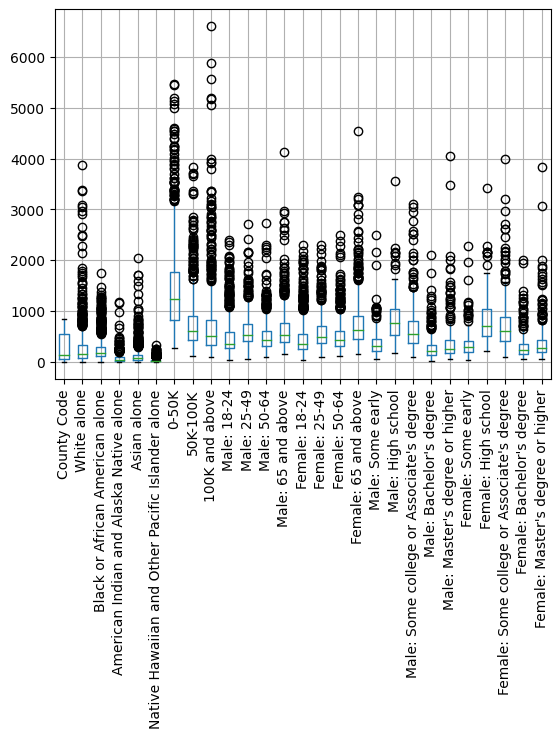

In [108]:
# Looking for outliers
data.boxplot(rot = 90)
plt.show()

# Every variable has outliers

In [110]:
# Log transformations

# List of columns for log transformations
columns = [
    'White alone', 'Black or African American alone', 'American Indian and Alaska Native alone', 'Asian alone',
    'Native Hawaiian and Other Pacific Islander alone', '0-50K', '50K-100K', '100K and above',
    'Male: 18-24', 'Male: 25-49', 'Male: 50-64', 'Male: 65 and above',
    'Female: 18-24', 'Female: 25-49', 'Female: 50-64', 'Female: 65 and above',
    'Male: Some early', 'Male: High school', "Male: Some college or Associate's degree", "Male: Bachelor's degree", "Male: Master's degree or higher",
    'Female: Some early', 'Female: High school', "Female: Some college or Associate's degree", "Female: Bachelor's degree", "Female: Master's degree or higher"
]

# Log transformations for specified columns
for column in columns:
    data[column + '_log'] = np.log(data[column])

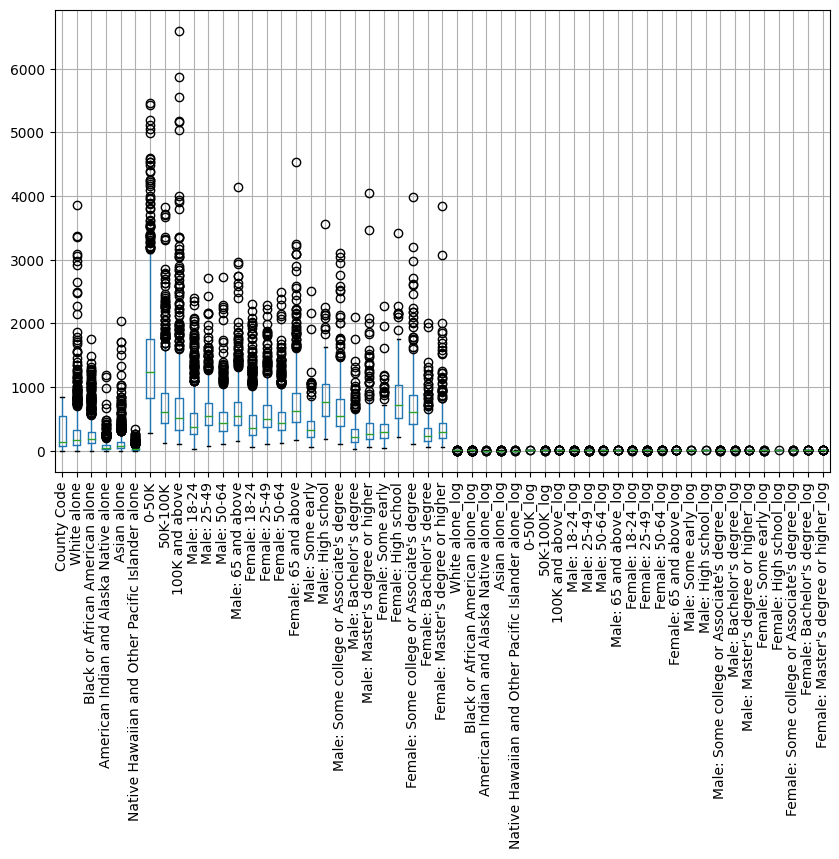

In [126]:
# Check boxplots again
plt.figure(figsize=(10, 6))
data.boxplot(rot = 90)
plt.show()
# Much better!

In [127]:
data.to_csv("model_data.csv")